# Import plaintext

In [1]:
import pathlib
import numpy as np
pt = []
for path in pathlib.Path("../../Downloads/pico_coaes/pico_sim_coaes_512_16pc/ciphers").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        #print(current_file.read())
        a = current_file.readline()[27:59]
        pt.append(a)
        current_file.close()
pt.sort()

In [2]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)

# Import key

In [3]:
key = []
for path in pathlib.Path("../../Downloads/pico_coaes/pico_sim_coaes_512_16pc/ciphers").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        #print(current_file.read())
        next(current_file)
        a = current_file.readline()[21:53]
        key.append(a)
        current_file.close()
key.sort()

In [4]:
key_array = []
for i in range (len(key)):
    b = bytes.fromhex(key[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    key_array.append(one_array)

# Import traces

In [5]:
import glob
import matplotlib.pylab as plt
NumofTraces = 512
strx = []
stry = []
floatx = []
floaty = []
path = "../../Downloads/pico_coaes/pico_sim_coaes_512_16pc/gate/*.data"
#path = "../../Downloads/pico_coaes_512/gate/picoaes_tsmc180_200_sca_trace_0_plot.png.data"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-19:]):
    #print(filename)
    with open(filename, 'r') as f:
        next(f)
        for line in f:
            row = line.split()
            strx.append(row[-2])
            stry.append(row[-1])
for i in range (len(strx)):
    floatx.append(float(strx[i]))
    floaty.append(float(stry[i]))
floatx = np.hstack(floatx)
floaty = np.hstack(floaty)
trace_array_x = np.array_split(floatx, NumofTraces)
trace_array_y = np.array_split(floaty, NumofTraces)

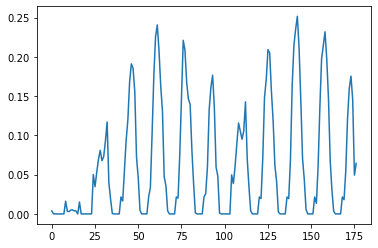

In [6]:
plt.plot(trace_array_y[0])

In [7]:
a = []
for i in range (len(trace_array_y)):
    a.append(trace_array_y[i][49:66])

In [8]:
a = np.array(a)

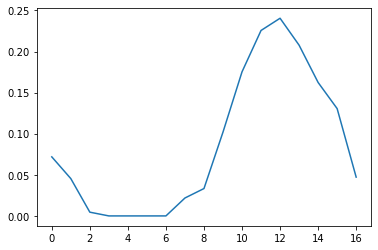

In [9]:
plt.plot(a[0])

In [7]:
trace_array_y = np.array(trace_array_y)

In [8]:
print(len(pt_array))
print(len(key_array))
print(len(trace_array_y))

512
512
512


In [28]:
#N=410
N=50

In [29]:
pt_array = pt_array[0:N]
key_array = key_array[0:N]
trace_array_y = trace_array_y[0:N]
print(len(pt_array))
print(len(key_array))
print(len(trace_array_y))

50
50
50


# SBox

In [9]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

# CPA Attack -- Method 1

In [10]:
from tqdm.notebook import trange
numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

knownkey = key_array[0]

key_guess = []
full_cpa_list = []
known_key = [0x00, 0x11, 0x22, 0x33, 0x44, 0x55, 0x66, 0x77, 0x88, 0x99, 0xaa, 0xbb, 0xcc, 0xdd, 0xee, 0xff]

for bnum in trange(0, 16):
    cpaoutput = [0] * 256
    maxcpa = [0] * 256
    for kguess in trange(0, 256):

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)
        
        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
            st1 = pt_array[tnum][bnum] ^ kguess
            st2 = sbox[st1]
            hyp[tnum] = HW[st1 ^ st2]

        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        # Mean of all points in trace
        meant = np.mean(trace_array_y, axis=0, dtype=np.float64)

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array_y[tnum, :] - meant

            sumnum = sumnum + (hdiff * tdiff)
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

    full_cpa_list.append(cpaoutput)
    #np.array(full_cpa_list[bnum]).tofile("new_cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(maxcpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, maxcpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely 00 (actual 00)
 Top 5 guesses: 
   00 - Diff = 0.302179
   9B - Diff = 0.232012
   BB - Diff = 0.217811
   68 - Diff = 0.195801
   8C - Diff = 0.188663




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely 11 (actual 11)
 Top 5 guesses: 
   11 - Diff = 0.349155
   8D - Diff = 0.172977
   2A - Diff = 0.165781
   D1 - Diff = 0.165083
   A2 - Diff = 0.160981




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely 22 (actual 22)
 Top 5 guesses: 
   22 - Diff = 0.296782
   DA - Diff = 0.213402
   BB - Diff = 0.197489
   7F - Diff = 0.191918
   FE - Diff = 0.188742




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 33 (actual 33)
 Top 5 guesses: 
   33 - Diff = 0.351981
   21 - Diff = 0.191366
   F0 - Diff = 0.187961
   82 - Diff = 0.183818
   A0 - Diff = 0.178612




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 44 (actual 44)
 Top 5 guesses: 
   44 - Diff = 0.343163
   5C - Diff = 0.187049
   D7 - Diff = 0.166362
   19 - Diff = 0.164355
   20 - Diff = 0.163482




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 55 (actual 55)
 Top 5 guesses: 
   55 - Diff = 0.331193
   18 - Diff = 0.194156
   2F - Diff = 0.169827
   7B - Diff = 0.166807
   A2 - Diff = 0.166715




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 66 (actual 66)
 Top 5 guesses: 
   66 - Diff = 0.236670
   DF - Diff = 0.185391
   94 - Diff = 0.172105
   16 - Diff = 0.169163
   75 - Diff = 0.168998




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 77 (actual 77)
 Top 5 guesses: 
   77 - Diff = 0.318871
   48 - Diff = 0.195036
   1E - Diff = 0.191116
   65 - Diff = 0.180829
   89 - Diff = 0.175875




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely 88 (actual 88)
 Top 5 guesses: 
   88 - Diff = 0.314969
   C7 - Diff = 0.214901
   F9 - Diff = 0.182806
   48 - Diff = 0.179166
   0F - Diff = 0.178166




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely 99 (actual 99)
 Top 5 guesses: 
   99 - Diff = 0.312449
   C9 - Diff = 0.199109
   42 - Diff = 0.193780
   FF - Diff = 0.183731
   10 - Diff = 0.181016




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely AA (actual AA)
 Top 5 guesses: 
   AA - Diff = 0.249165
   F8 - Diff = 0.176443
   36 - Diff = 0.172269
   03 - Diff = 0.171901
   0D - Diff = 0.171900




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely BB (actual BB)
 Top 5 guesses: 
   BB - Diff = 0.355077
   05 - Diff = 0.220692
   CC - Diff = 0.212355
   75 - Diff = 0.187057
   63 - Diff = 0.183541




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely CC (actual CC)
 Top 5 guesses: 
   CC - Diff = 0.231735
   5B - Diff = 0.219483
   91 - Diff = 0.189650
   93 - Diff = 0.188776
   3E - Diff = 0.184038




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely DD (actual DD)
 Top 5 guesses: 
   DD - Diff = 0.437950
   CC - Diff = 0.209640
   87 - Diff = 0.200294
   32 - Diff = 0.189146
   0F - Diff = 0.187656




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely A7 (actual EE)
 Top 5 guesses: 
   A7 - Diff = 0.192200
   F1 - Diff = 0.185710
   97 - Diff = 0.185672
   C9 - Diff = 0.180291
   36 - Diff = 0.169478




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely FF (actual FF)
 Top 5 guesses: 
   FF - Diff = 0.245781
   06 - Diff = 0.192523
   8E - Diff = 0.187167
   91 - Diff = 0.182564
   78 - Diff = 0.178703




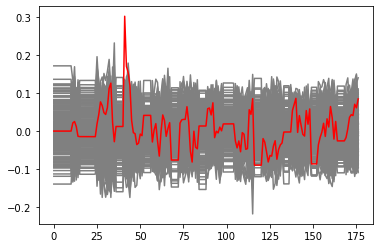

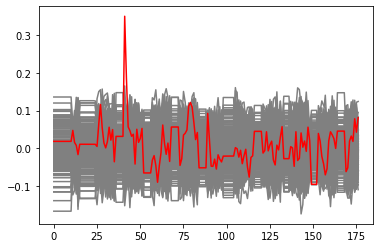

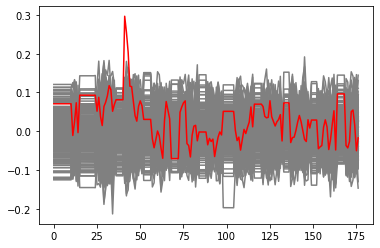

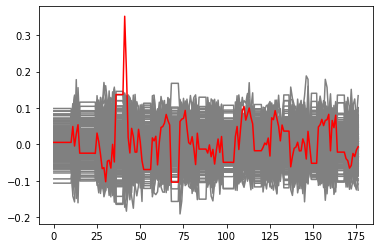

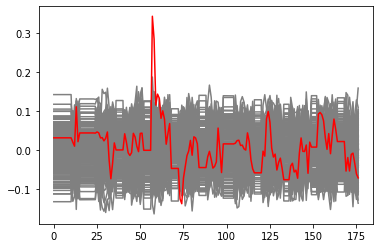

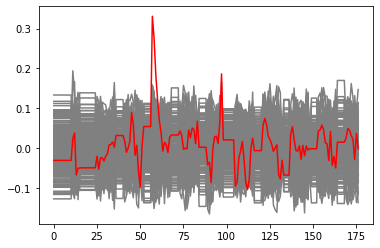

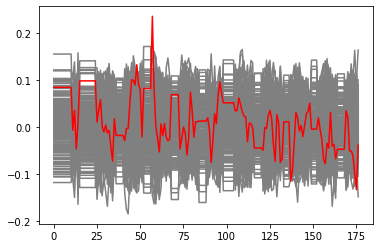

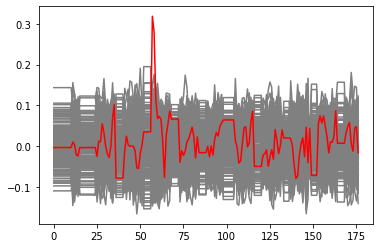

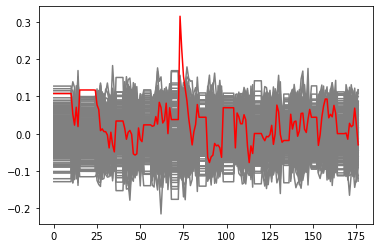

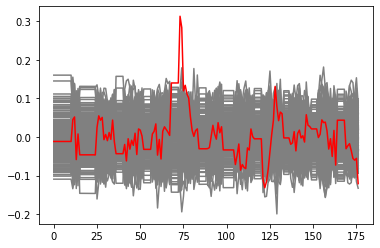

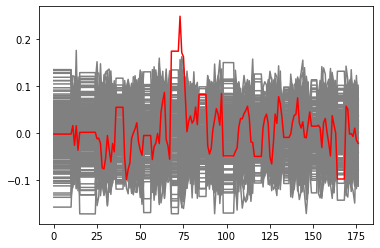

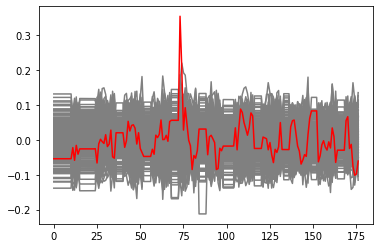

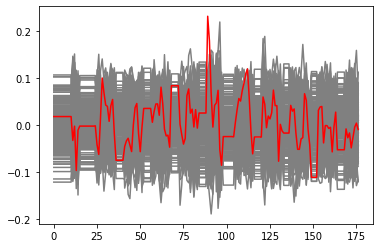

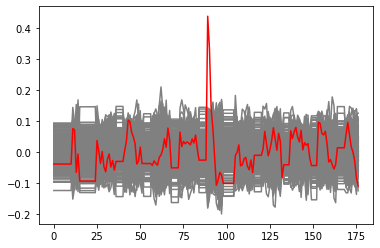

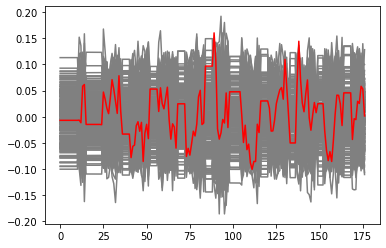

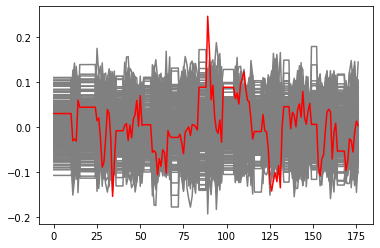

In [11]:
for subkey in range(0,16):
    correct_key = known_key[subkey] 
    subkey = subkey
    plt.figure()
    for guess in range(0, 256):
        if (guess == correct_key):
            plt.plot(full_cpa_list[subkey][guess],color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(full_cpa_list[subkey][guess],color="grey")
    plt.show()

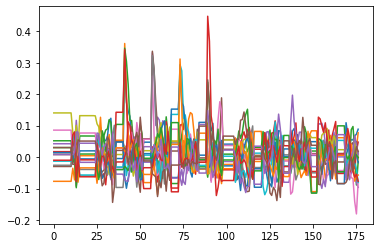

In [17]:
plt.figure()
for subkey in range(0, 16):
    plt.plot(full_cpa_list[subkey][known_key[subkey]])
plt.show()

# CPA Attack -- Method 2

In [774]:
def intermediate(pt, keyguess):
    return sbox[np.uint64(pt) ^ np.uint64(keyguess)]

def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

HW = [bin(n).count("1") for n in range(0, 256)]

In [775]:
t_bar = mean(np.array(trace_array_y))
o_t = std_dev(np.array(trace_array_y), t_bar)

key_guess = []
full_cpa_list = []
known_key = [0x54, 0xee, 0xff, 0x11, 0x21, 0x32, 0xeb, 0x43, 0xbb, 0xaa, 0xff, 0x23, 0x98, 0x54, 0x12, 0x12]

for bnum in trange(0, 16):
    max_cpa = [0] * 256
    byte_cpa_list = [0] * 256
    for kguess in trange(0, 256):
        hws = np.array([[HW[intermediate(textin[bnum],kguess)] for textin in pt_array]]).transpose()
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(np.array(trace_array_y), t_bar, hws, hws_bar)
        cpaoutput = correlation/(o_t*o_hws)
        byte_cpa_list[kguess] = cpaoutput
        max_cpa[kguess] = np.max(abs(cpaoutput))
        
    full_cpa_list.append(byte_cpa_list[:])
    np.array(full_cpa_list[bnum]).tofile("cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(max_cpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, max_cpa[g]))
    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely 70 (actual 54)
 Top 5 guesses: 
   70 - Diff = 0.191178
   5B - Diff = 0.181567
   E3 - Diff = 0.178648
   DC - Diff = 0.176567
   3D - Diff = 0.176465




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely C1 (actual EE)
 Top 5 guesses: 
   C1 - Diff = 0.181125
   A2 - Diff = 0.180267
   08 - Diff = 0.177045
   C2 - Diff = 0.174486
   67 - Diff = 0.170156




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely B0 (actual FF)
 Top 5 guesses: 
   B0 - Diff = 0.201083
   1A - Diff = 0.198243
   4A - Diff = 0.192939
   15 - Diff = 0.174444
   EB - Diff = 0.172737




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 42 (actual 11)
 Top 5 guesses: 
   42 - Diff = 0.190927
   AC - Diff = 0.179983
   E5 - Diff = 0.174894
   7D - Diff = 0.170898
   D2 - Diff = 0.169446




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely C3 (actual 21)
 Top 5 guesses: 
   C3 - Diff = 0.174183
   03 - Diff = 0.173402
   2C - Diff = 0.172288
   CE - Diff = 0.171281
   6C - Diff = 0.167700




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 4E (actual 32)
 Top 5 guesses: 
   4E - Diff = 0.191232
   45 - Diff = 0.174436
   C9 - Diff = 0.172891
   3B - Diff = 0.165021
   C2 - Diff = 0.162563




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely B6 (actual EB)
 Top 5 guesses: 
   B6 - Diff = 0.191482
   4B - Diff = 0.180112
   0A - Diff = 0.176356
   A3 - Diff = 0.176252
   A7 - Diff = 0.171689




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 9C (actual 43)
 Top 5 guesses: 
   9C - Diff = 0.185697
   0A - Diff = 0.170553
   EC - Diff = 0.169793
   56 - Diff = 0.168602
   14 - Diff = 0.167106




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely FA (actual BB)
 Top 5 guesses: 
   FA - Diff = 0.185589
   02 - Diff = 0.181042
   26 - Diff = 0.179347
   32 - Diff = 0.171700
   4E - Diff = 0.169327




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely 09 (actual AA)
 Top 5 guesses: 
   09 - Diff = 0.170660
   62 - Diff = 0.170567
   3B - Diff = 0.168688
   CB - Diff = 0.168099
   A3 - Diff = 0.166647




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely 19 (actual FF)
 Top 5 guesses: 
   19 - Diff = 0.199828
   F2 - Diff = 0.194815
   4D - Diff = 0.191657
   4E - Diff = 0.178899
   CD - Diff = 0.177907




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely F0 (actual 23)
 Top 5 guesses: 
   F0 - Diff = 0.187781
   2E - Diff = 0.173832
   D2 - Diff = 0.171680
   67 - Diff = 0.168133
   F8 - Diff = 0.164778




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely C9 (actual 98)
 Top 5 guesses: 
   C9 - Diff = 0.189732
   38 - Diff = 0.181566
   08 - Diff = 0.171767
   7D - Diff = 0.170756
   76 - Diff = 0.169689




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely 21 (actual 54)
 Top 5 guesses: 
   21 - Diff = 0.190408
   68 - Diff = 0.189302
   D1 - Diff = 0.188638
   86 - Diff = 0.185182
   4F - Diff = 0.175383




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely 71 (actual 12)
 Top 5 guesses: 
   71 - Diff = 0.203626
   43 - Diff = 0.185565
   81 - Diff = 0.176445
   61 - Diff = 0.175973
   13 - Diff = 0.175208




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely EC (actual 12)
 Top 5 guesses: 
   EC - Diff = 0.173181
   3A - Diff = 0.170653
   4A - Diff = 0.162502
   3B - Diff = 0.160894
   66 - Diff = 0.159831




# How Many Traces Needed for Method 1

In [ ]:
traces_enc_full = np.array(np.array_split(np.fromfile("../../Downloads/traces_enc_swaes_60k.bin", dtype=np.float64), N))

In [ ]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [ ]:
full_cpa_list = []
key_full_guess = []
how_many_correct_keybytes = []
is_same = 0

knownkey = key_arrays[0]
traces_enc = []
pt = []
known_key = [0x54, 0xee, 0xff, 0x11, 0x21, 0x32, 0xeb, 0x43, 0xbb, 0xaa, 0xff, 0x23, 0x98, 0x54, 0x12, 0x12]

for traces in trange(1000,25000,1000):
    traces_enc = np.array(traces_enc_full[0:traces])
    pt = np.array(text_arrays[0:traces])
    numtraces = len(traces_enc) 
    numpoint = len(traces_enc[0]) 
    
    key_guess = []
    cpa_list = []
    for bnum in trange(0, 16):
        
        cpaoutput = [0] * 256
        maxcpa = [0] * 256
        
        for kguess in range(0, 256):

        # Initialize arrays &amp; variables to zero
            sumnum = np.zeros(numpoint)
            sumden1 = np.zeros(numpoint)
            sumden2 = np.zeros(numpoint)
        
            hyp = np.zeros(numtraces)
            for tnum in range(0, numtraces):
                hyp[tnum] = HW[intermediate(pt[tnum][bnum], kguess)]

            # Mean of hypothesis
            meanh = np.mean(hyp, dtype=np.float64)

            # Mean of all points in trace
            meant = np.mean(traces_enc, axis=0, dtype=np.float64)

            # For each trace, do the following
            for tnum in range(0, numtraces):
                hdiff = (hyp[tnum] - meanh)
                tdiff = traces_enc[tnum, :] - meant

                sumnum = sumnum + (hdiff * tdiff)
                sumden1 = sumden1 + hdiff * hdiff
                sumden2 = sumden2 + tdiff * tdiff

            cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        cpa_list.append(cpaoutput)
        sorted_args = np.argsort(maxcpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

# How Many Traces Needed for Method 2

In [ ]:
full_cpa_list = []
key_full_guess = []
how_many_correct_keybytes = []
is_same = 0

traces_enc = []
text_arrays = []

known_key = [0x54, 0xee, 0xff, 0x11, 0x21, 0x32, 0xeb, 0x43, 0xbb, 0xaa, 0xff, 0x23, 0x98, 0x54, 0x12, 0x12]

for traces in trange(1000,25000,1000):
    traces_enc = np.array(traces_enc_full[0:traces])
    text_arrays = np.array(text_arrays_full[0:traces])
    
    t_bar = mean(traces_enc)
    o_t = std_dev(traces_enc, t_bar)
    
    key_guess = []
    cpa_list = []
    for bnum in trange(0, 16):
        
        max_cpa = [0] * 256
        byte_cpa_list = [0] * 256
        
        for kguess in range(0, 256):
            hws = np.array([[HW[intermediate(textin[bnum],kguess)] for textin in text_arrays]]).transpose()
            hws_bar = mean(hws)
            o_hws = std_dev(hws, hws_bar)
            correlation = cov(traces_enc, t_bar, hws, hws_bar)
            cpaoutput = correlation/(o_t*o_hws)
            byte_cpa_list[kguess] = cpaoutput
            max_cpa[kguess] = np.max(abs(cpaoutput))
            
        cpa_list.append(byte_cpa_list)
        sorted_args = np.argsort(max_cpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")